# FIFA 21 Player Position Prediction
---
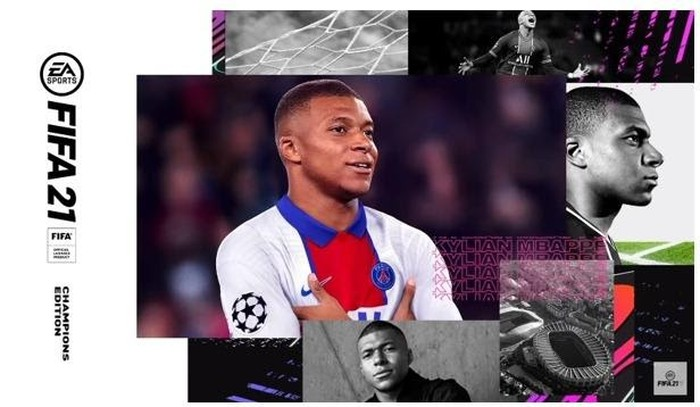

By: Mohammad Aditya Rafi Pratama (madityarafip31@gmail.com) - Depok, Indonesia

Inspired by the project done by [Siddharth](https:///www.analyticsvidhya.com/blog/2021/07/performing-multi-class-classification-on-fifa-dataset-using-keras/) in his article, on this occasion I designed a model using Machine Learning to predict the position of a player in the latest football game, FIFA 21. In this project I also use the prediction results to get a list of players according to position obtained from the prediction results.
---

---

The first thing to do is get the libraries used in this project. The required library functions to analyze the dataset and design the Machine Learning model.

In [2]:
# Data processing and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Tensorflow
import tensorflow as tf
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

**DATASET**

---

The dataset used for the problem has complete data about all the players and their attributes data in FIFA 21 games by EA Sports. It includes all competitive football player’s details. The dataset can be obtained from the following link:

https://www.kaggle.com/ekrembayar/fifa-21-complete-player-dataset



In [ ]:
dataset = pd.read_csv('fifa21_male2.csv')
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,...,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,...,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,...,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,...,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,...,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,...,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


This dataset has 17125 player’s details with around 107 features for each player. The best position of the player is a feature which I would like to predict with the help of the rest of the features available. So here I train my Machine Learning model to classify the test data and predict to which position the player would be belonging to with all the attributes associated with that player.

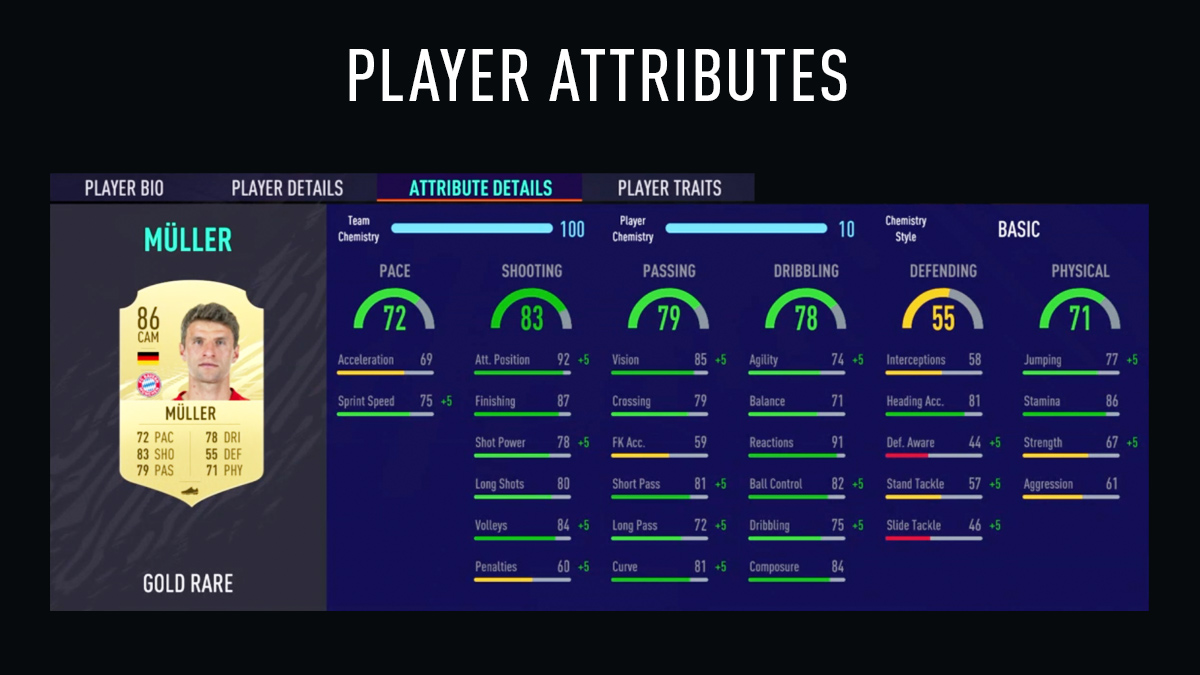

The following is an analysis of the attributes of players for each available position in this dataset. This analysis is inspired by attribute analysis such as that conducted by [Paramartha Sengupta](https:www.kaggle.com/paramarthasengupta/fifa-21-eda-and-visualization#How-does-the-game-attributes-vary-with-position?).

=========================================Overall Attributes for Every Players Position in FIFA 21 Dataset===============================================
 


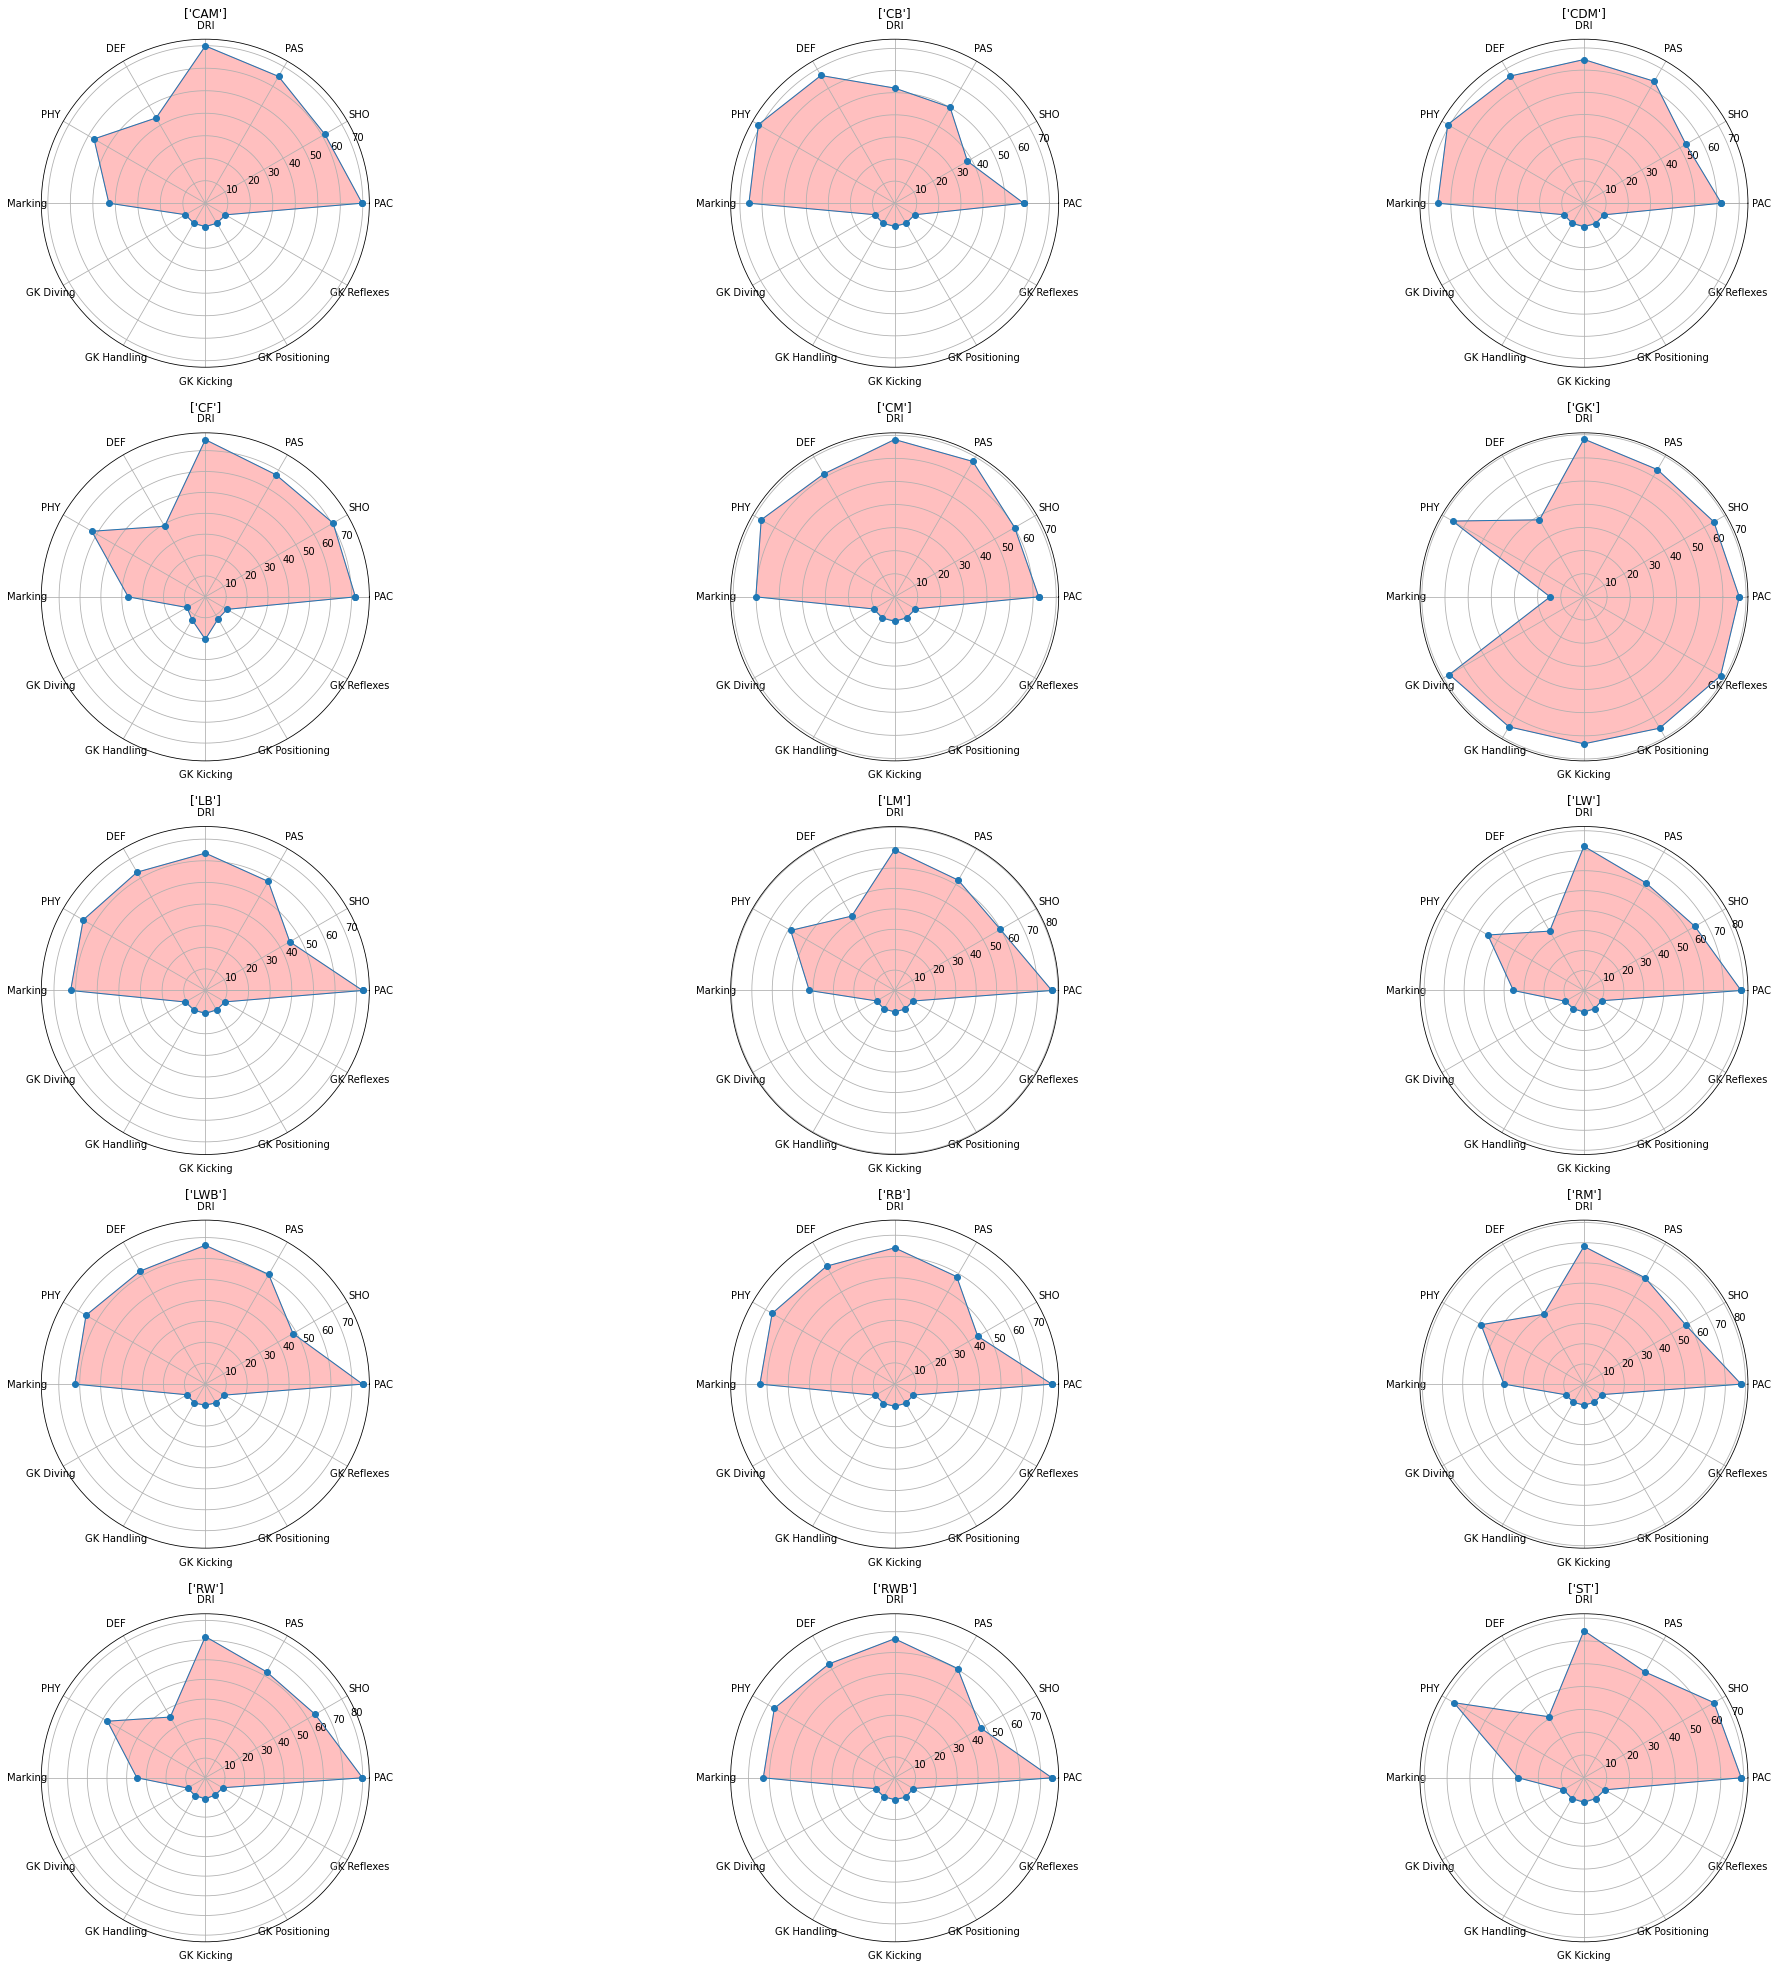

In [ ]:
pos_PAC=dataset.groupby('BP').apply(lambda x:np.average(x['PAC'])).reset_index(name='PAC')
pos_SHO=dataset.groupby('BP').apply(lambda x:np.average(x['SHO'])).reset_index(name='SHO')
pos_PAS=dataset.groupby('BP').apply(lambda x:np.average(x['PAS'])).reset_index(name='PAS')
pos_DRI=dataset.groupby('BP').apply(lambda x:np.average(x['DRI'])).reset_index(name='DRI')
pos_DEF=dataset.groupby('BP').apply(lambda x:np.average(x['DEF'])).reset_index(name='DEF')
pos_PHY=dataset.groupby('BP').apply(lambda x:np.average(x['PHY'])).reset_index(name='PHY')
pos_mark=dataset.groupby('BP').apply(lambda x:np.average(x['Marking'])).reset_index(name='Marking')
pos_GKdiv=dataset.groupby('BP').apply(lambda x:np.average(x['GK Diving'])).reset_index(name='GK Diving')
pos_GKhan=dataset.groupby('BP').apply(lambda x:np.average(x['GK Handling'])).reset_index(name='GK Handling')
pos_GKkick=dataset.groupby('BP').apply(lambda x:np.average(x['GK Kicking'])).reset_index(name='GK Kicking')
pos_GKpos=dataset.groupby('BP').apply(lambda x:np.average(x['GK Positioning'])).reset_index(name='GK Positioning')
pos_GKref=dataset.groupby('BP').apply(lambda x:np.average(x['GK Reflexes'])).reset_index(name='GK Reflexes')

pos_overall1=pd.merge(pos_PAC,pos_SHO,how='inner',left_on='BP',right_on='BP')
pos_overall2=pd.merge(pos_PAS,pos_DRI,how='inner',left_on='BP',right_on='BP')
pos_overall3=pd.merge(pos_DEF,pos_PHY,how='inner',left_on='BP',right_on='BP')
pos_overall4=pd.merge(pos_mark,pos_GKdiv,how='inner',left_on='BP',right_on='BP')
pos_overall5=pd.merge(pos_GKhan,pos_GKkick,how='inner',left_on='BP',right_on='BP')
pos_overall6=pd.merge(pos_GKpos,pos_GKref,how='inner',left_on='BP',right_on='BP')
pos_overall11=pd.merge(pos_overall1,pos_overall2,how='inner',left_on='BP',right_on='BP')
pos_overall22=pd.merge(pos_overall3,pos_overall4,how='inner',left_on='BP',right_on='BP')
pos_overall33=pd.merge(pos_overall5,pos_overall6,how='inner',left_on='BP',right_on='BP')
pos_overall12=pd.merge(pos_overall11,pos_overall22,how='inner',left_on='BP',right_on='BP')
pos_overall=pd.merge(pos_overall12,pos_overall33,how='inner',left_on='BP',right_on='BP')

print('=========================================Overall Attributes for Every Players Position in FIFA 21 Dataset===============================================')
print(' ')
fig=plt.figure(figsize=(35,35))
for i in range(0,15):
    labels=np.array(['PAC',
                     'SHO', 
                     'PAS', 
                     'DRI',
                     'DEF',
                     'PHY',
                     'Marking',
                     'GK Diving',
                     'GK Handling',
                     'GK Kicking',
                     'GK Positioning',
                     'GK Reflexes'])
    stats=pos_overall.loc[i,labels].values

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    
    ax = fig.add_subplot(5,3,i+1, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=1)
    ax.fill(angles, stats,color='red',alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title([pos_overall.loc[i,"BP"]])
    ax.grid(True)



It can be seen from the visualization above that each position has different attributes. For example, the Center Back (CB) position has good DEF (defense) and Marking attributes but has poor PAC (pace) attributes. In contrast to the Right Back (RB) or Left Back (LB) position, in this position the PAC (pace) attribute has a better value while still having DEF (defense) and Marking attributes are quite good.

For the goalkeeper position (GK) itself has its own attributes needed by a goalkeeper. From the visualization it can be seen that the goalkeeper position also has several other pretty good attributes such as DRI (dribbling) and PAC (pace) which are both important attributes in the goalkeeper position in modern football today, where the goalkeeper position is required to can do build up play from the defensive line.








**Dataset Preparation**


---



In [ ]:
filter_data = dataset[['Name', 'Age', 'BP', 'Position', 'OVA', 'BOV', 'Club', 
                       'Nationality', 'Value', 'Wage']]
filter_data.head(20)

,Name,Age,BP,Position,OVA,BOV,Club,Nationality,Value,Wage
0,G. Pasquale,33,LWB,LM,69,71,Udinese,Italy,€625K,€7K
1,Luis García,37,CM,CM CAM CDM,71,70,KAS Eupen,Spain,€600K,€7K
2,J. Cole,33,CAM,CAM RM RW LM,71,71,Coventry City,England,€1.1M,€15K
3,D. Yorke,36,ST,NaN,68,70,Sunderland,Trinidad &amp; Tobago,€0,€0
4,Iniesta,36,CAM,CM CAM,81,82,Vissel Kobe,Spain,€5.5M,€12K
5,D. Odonkor,27,RW,RW RM,66,66,Alemannia Aachen,Germany,€725K,€5K
6,E. Belözoğlu,38,CM,CM CDM,77,77,Fenerbahçe SK,Turkey,€2.8M,€44K
7,R. Giggs,39,CAM,LM CM CAM,78,78,Manchester United,Wales,€1K,€60K
8,G. Neville B,35,CB,RB CB RWB,76,78,Manchester United,England,€0,€0
9,P. Scholes,37,CAM,CM CDM,80,82,Manchester United,England,€400K,€40K


The *filter_data* dataset is used as a dataset which will later be used to list the positions that the model predicts.

In [ ]:
new_data = dataset[['BP', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
                    'Marking', 'GK Diving', 'GK Handling',
                    'GK Kicking', 'GK Positioning', 'GK Reflexes']]
new_data.head()                    

,BP,PAC,SHO,PAS,DRI,DEF,PHY,Marking,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,LWB,71,59,70,71,68,69,70,14,5,15,10,12
1,CM,53,69,73,69,58,63,70,9,12,13,11,11
2,CAM,45,68,76,77,36,52,35,9,6,13,16,7
3,ST,61,66,66,69,47,60,34,5,21,64,21,21
4,CAM,58,70,85,85,63,59,68,6,13,6,13,7


This *new_data* dataset is used for the training and validation process of the Machine Learnig model that has been designed. This dataset is all the required features which these features need to take into consideration.

In the model design process, the dataset used must not have a missing value (NaN), because if there is a null or missing value, it will encounter an error. Therefore, the process below is carried out to check whether there is a missing value in the dataset used.

In [ ]:
new_data.isnull().sum()

BP                0
PAC               0
SHO               0
PAS               0
DRI               0
DEF               0
PHY               0
Marking           0
GK Diving         0
GK Handling       0
GK Kicking        0
GK Positioning    0
GK Reflexes       0
dtype: int64

**Data Categorization**


---

Player positions in the dataset are categorized into 4 categories, namely:


1.   Goalkeeper (GK) = 0
2.   Defender (DEF POS) = 1
3.   Midfielder (MID POS) = 2
4.   Forward (FOR POS) = 3






In [ ]:
forward_player = ['ST', 'LW', 'RW', 'CF']
midfielder_player = ['CM', 'CDM', 'CAM', 'RM', 'LM',]
defender_player = ['CB', 'LWB', 'RWB', 'LB', 'RB']

new_data.loc[new_data['BP'] == 'GK', 'BP'] = 0

new_data.loc[new_data['BP'].isin(defender_player), 'BP'] = 1

new_data.loc[new_data['BP'].isin(midfielder_player), 'BP'] = 2

new_data.loc[new_data['BP'].isin(forward_player), 'BP'] = 3

In [ ]:
pos = pd.get_dummies(new_data.BP)
new_data = pd.concat([new_data, pos], axis=1)
new_data = new_data.drop(columns='BP')
new_data = new_data.rename(columns={0:'GK', 1:'DEF POS', 2:'MID POS', 3:'FOW POS'})
new_data.head()

,PAC,SHO,PAS,DRI,DEF,PHY,Marking,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,GK,DEF POS,MID POS,FOW POS
0,71,59,70,71,68,69,70,14,5,15,10,12,0,1,0,0
1,53,69,73,69,58,63,70,9,12,13,11,11,0,0,1,0
2,45,68,76,77,36,52,35,9,6,13,16,7,0,0,1,0
3,61,66,66,69,47,60,34,5,21,64,21,21,0,0,0,1
4,58,70,85,85,63,59,68,6,13,6,13,7,0,0,1,0


**Feature Normalization**


---

Before passing the data into the neural network, in this project used MinMaxScalar to scale all values using the fit_transform function.

In [ ]:
sc = StandardScaler()
MinMax = MinMaxScaler()
x_data = pd.DataFrame(
    MinMax.fit_transform(new_data[['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
                    'Marking', 'GK Diving', 'GK Handling',
                    'GK Kicking', 'GK Positioning', 'GK Reflexes']]),
    columns = ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
               'Marking', 'GK Diving', 'GK Handling','GK Kicking', 
               'GK Positioning', 'GK Reflexes'])
x_data.head()

,PAC,SHO,PAS,DRI,DEF,PHY,Marking,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0.647887,0.558442,0.661765,0.641791,0.708861,0.636364,0.736264,0.146067,0.043956,0.152174,0.097826,0.123596
1,0.394366,0.688312,0.705882,0.611940,0.582278,0.545455,0.736264,0.089888,0.120879,0.130435,0.108696,0.112360
2,0.281690,0.675325,0.750000,0.731343,0.303797,0.378788,0.351648,0.089888,0.054945,0.130435,0.163043,0.067416
3,0.507042,0.649351,0.602941,0.611940,0.443038,0.500000,0.340659,0.044944,0.219780,0.684783,0.217391,0.224719
4,0.464789,0.701299,0.882353,0.850746,0.645570,0.484848,0.714286,0.056180,0.131868,0.054348,0.130435,0.067416


In [ ]:
y_data = new_data[['GK', 'DEF POS', 'MID POS', 'FOW POS']]
y_data.head()

,GK,DEF POS,MID POS,FOW POS
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


**Train Validation Split**



---

In this project the train and validation data are divided into 80% for train data and 20% for validation data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.2)

**Model Design**


---



In [ ]:
model = Sequential()
model.add(Dense(128, input_shape = (12,), activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(4, activation = "softmax"))


model.compile(Adam(lr = 0.0001), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


The above diagram explains the Machine Learning model which has been designed. The model has three reLU units and the final layer which is a dense layer that has softmax activation for predicting multi-class probability output. In the model there are dropout layer of 0.3 in between for regularization. This model also used the categorical cross-entropy as loss function with the Adam optimizer.

Before entering the training process/training model, a callback process is needed that functions to stop the training process when it reaches the specified accuracy, which in this project will stop when it reaches >90% accuracy.

In [ ]:
import tensorflow as tf
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nReached 90% accuracy") 
            self.model.stop_training = True 
     
callbacks = Callback()

**Model Training**


---



In [ ]:
num_epochs = int(input('Epoch = '))
print(' ')
history = model.fit(x_train, y_train, 
                    epochs=num_epochs, 
                    validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=[callbacks]
                    )

Epoch = 100
 
Epoch 1/100
429/429 [==============================] - 17s 5ms/step - loss: 1.3159 - accuracy: 0.3916 - val_loss: 0.9220 - val_accuracy: 0.7034
Epoch 2/100
429/429 [==============================] - 1s 3ms/step - loss: 0.9113 - accuracy: 0.6329 - val_loss: 0.6020 - val_accuracy: 0.7807
Epoch 3/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6824 - accuracy: 0.7045 - val_loss: 0.4985 - val_accuracy: 0.8126
Epoch 4/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5859 - accuracy: 0.7442 - val_loss: 0.4526 - val_accuracy: 0.8146
Epoch 5/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5505 - accuracy: 0.7567 - val_loss: 0.4220 - val_accuracy: 0.8283
Epoch 6/100
429/429 [==============================] - 1s 3ms/step - loss: 0.5118 - accuracy: 0.7802 - val_loss: 0.4016 - val_accuracy: 0.8385
Epoch 7/100
429/429 [==============================] - 1s 3ms/step - loss: 0.4907 - accuracy: 0.7898 - val_loss: 0.3911 - val_a

In 100 epochs, the accuracy value for training is 87.54% and validation is 88.67%.

**Accuracy and Loss Plot**


---



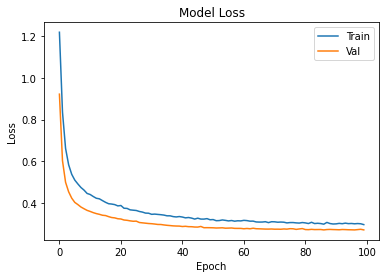

In [ ]:
#Grafik loss dari model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

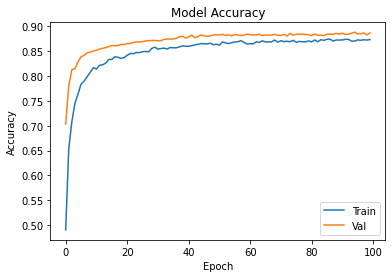

In [ ]:
#Grafik accuracy dari model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Player Position Prediction**


---
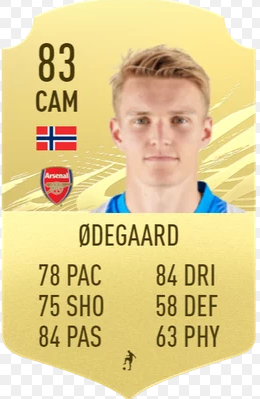

Predictions are made by entering the attributes of the players contained in FIFA 21. In this case the player used is Martin Odegaard, a Midfield player who plays for Arsenal FC loaned from Real Madrid.

In [ ]:
print('Insert Player Attribute')

PAC = int(input('PAC = ')) 
SHO = int(input('SHO = ')) 
PAS = int(input('PAS = ')) 
DRI = int(input('DRI = '))
DEF = int(input('DEF = ')) 
PHY = int(input('PHY = ')) 
Marking = int(input('Marking = ')) 
GK_Diving = int(input('GK Diving = ')) 
GK_Handling = int(input('GK Handling = '))
GK_Kicking = int(input('GK Kicking = ')) 
GK_Positioning = int(input('GK Positioning = ')) 
GK_Reflexes = int(input('GK Reflexes = '))
x_predict = [[PAC, 
              SHO, 
              PAS, 
              DRI, 
              DEF, 
              PHY, 
              Marking, 
              GK_Diving, 
              GK_Handling,
              GK_Kicking, 
              GK_Positioning, 
              GK_Reflexes]]
print(' ')
print('Predicting Player Position....')
player_pos = model.predict(x_predict)
print(' ')
print('Player Position :')
if player_pos[0][0]==1:
  print('=> Goalkeeper')
  comp = 0
elif player_pos[0][1]==1:
  print('=> Defense')
  comp = 1
elif player_pos[0][2]==1:
  print('=> Midfield')
  comp = 2
elif player_pos[0][3]==1:
  print('=> Forward')
  comp = 3       
else:
  print('Unknown Position!!')

Insert Player Attribute
PAC = 78
SHO = 75
PAS = 84
DRI = 84
DEF = 58
PHY = 63
Marking = 50
GK Diving = 5
GK Handling = 6
GK Kicking = 5
GK Positioning = 7
GK Reflexes = 7
 
Predicting Player Position....
 
Player Position :
Unknown Position!!


In [ ]:
print(player_pos)

[[1.6115108e-36 3.6453728e-24 9.9998713e-01 1.2865281e-05]]


From the prediction results obtained Unknown Position results. This is due to the accuracy of the model which is still around 85%. So that the accuracy of the model can be said to be a little less good in some conditions such as the above conditions.

Therefore, if desired, the results of the predictions can be rounded using the Numpy function, namely


```
np.around(player_pos)
```




Thus, the correct prediction of the position of the player and the list of players can be generated as shown below.

In [ ]:
print('Predicting Player Position....')
player_pos = model.predict(x_predict)
player_pos = np.around(player_pos)
print(' ')
print('Player Position :')
if player_pos[0][0]==1:
  print('=> Goalkeeper')
  comp = 0
elif player_pos[0][1]==1:
  print('=> Defense')
  comp = 1
elif player_pos[0][2]==1:
  print('=> Midfield')
  comp = 2
elif player_pos[0][3]==1:
  print('=> Forward')
  comp = 3       
else:
  print('Unknown Position!!')

Predicting Player Position....
 
Player Position :
=> Midfield


In [ ]:
if comp == 0:
  position = 'GK'
elif comp == 1:
  position = ['CB', 'LWB', 'RWB', 'LB', 'RB']
elif comp == 2:
  position = ['CM', 'CDM', 'CAM', 'RM', 'LM',]
elif comp == 3:
  position = ['ST', 'LW', 'RW', 'CF']

compare = filter_data[filter_data['BP'].isin(position)] 
print('\n==============================Player List===============================\n', 
      compare)


==============================Player List===============================
                   Name  Age   BP  ...   Nationality  Value  Wage
1          Luis García   37   CM  ...         Spain  €600K   €7K
2              J. Cole   33  CAM  ...       England  €1.1M  €15K
4              Iniesta   36  CAM  ...         Spain  €5.5M  €12K
6         E. Belözoğlu   38   CM  ...        Turkey  €2.8M  €44K
7             R. Giggs   39  CAM  ...         Wales    €1K  €60K
...                ...  ...  ...  ...           ...    ...   ...
17110       Pau Víctor   18  CAM  ...         Spain  €650K  €800
17114          S. Eide   18  CAM  ...        Norway  €100K  €500
17115     K. Torgersen   17  CAM  ...        Norway   €70K  €500
17117  S. Diarrassouba   18   RM  ...  Burkina Faso  €250K  €900
17121       W. Rickard   18  CAM  ...         Wales  €130K   €3K

[6691 rows x 10 columns]
